# Pandas

Download the dataset.tsv file from the canvas.
### 1. Import the libraries

In [1]:
import pandas as pd
import seaborn as sbn

### Comment: Using counter for dict in 10

In [2]:
from collections import Counter

### 2. Import the dataset

In [3]:
data_path = "dataset.tsv"
data = pd.read_table(data_path)

### 3. Print the first 50 entries

In [4]:
data[0:50]

,order_id,quantity,product_name,option_description,product_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### 4. Print the number of datapoints (rows) in the dataset?

In [5]:
print(len(data.index))

4622


### 5. Print the number of columns in the dataset?

In [6]:
print(data.columns.size)

5


###  7. Print the names of columns.

In [7]:
for col in data.columns:
    print(col)

order_id
quantity
product_name
option_description
product_price


### 8. Print the most ordered product and it's count?
#### You have to only consider "product_name" column for this.
#### Count should reflect, for how many times the product was ordered across all the orders

In [8]:
print(data["product_name"].value_counts().idxmax(), data["product_name"].value_counts().max())

Chicken Bowl 726


### 9. Print the number of orders in total?
#### tip: Number of unique order_ids

In [9]:
print(max(data["order_id"]))

1834


### 10. Print the most ordered product in the option_description column?
#### Only non NaN etries should be considerd
#### Discard the brakets and split by ",", create a dictionary where keys are items (which you get after spliting) and values are their respective counts across all the orders


#### Comment: Need to remove in two steps, as removing in one step somehow doesnt remove all brackets.

In [10]:
data["option_description"] = data["option_description"].str.replace('[', '')
data["option_description"] = data["option_description"].str.replace(']', '')

In [11]:
d = []
for i in data["option_description"].dropna():
    for j in str(i).split(","):
        d.append(j)

option_description_dict = Counter(d)
option_description_dict.most_common(1)[0]

(' Rice', 2383)

### 11. Print the number of products orderd in total?
#### Either summation of all quantities (sum of quantity column)
#### Or 
#### Summation of the count of products( considring only counting product once per order)

In [12]:
print(data["quantity"].sum())

4972


### 12. Cast the product price to float type

In [13]:
data["product_price"] = pd.to_numeric(data["product_price"].str.replace('$', ''), errors ='coerce')

### 13. Print the quantity of the costliest entry in product_price column?
#### Sort the dataframe by product_price column and get the quantity column value for row 1


In [14]:
data.sort_values("product_price",ascending=False).iloc[0]["quantity"]

15

### 14. What was the revenue for the whole period in the dataset?
#### Sum (quantity column * product_price column)

In [15]:
sum(data["quantity"] * data["product_price"])

39237.020000000055

### 15. Print the total no of orders in the whole period, where order_id is odd?

In [16]:
print(sum(data["order_id"] % 2))

2308


### 16. Print the average price per order?

In [17]:
print(sum(data["quantity"] * data["product_price"]) / max(data["order_id"]))

21.3942311886587


### 17. How many unique products were sold?
#### Number of unique items in the product_name column.

In [18]:
data["product_name"].value_counts().size

50

### 18. Print the number of time Veggie Burrito was ordered?

In [19]:
print(data["product_name"].str.count("Veggie Burrito").sum())

95


### 19. Print the products, which cost more than $10.00?
#### Use product_price and product_name columns only, irrespective of quantity value

In [21]:
print(data["product_name"][data["product_price"] > 10.00].unique())

['Chicken Bowl' 'Steak Burrito' 'Chicken Burrito' 'Barbacoa Bowl'
 'Veggie Burrito' 'Veggie Bowl' 'Chicken Soft Tacos' 'Steak Bowl'
 'Carnitas Burrito' 'Carnitas Bowl' 'Barbacoa Burrito'
 'Chicken Salad Bowl' 'Barbacoa Crispy Tacos' 'Veggie Salad Bowl'
 'Chicken Crispy Tacos' 'Chicken Salad' 'Steak Salad Bowl' 'Bowl'
 'Veggie Soft Tacos' 'Barbacoa Soft Tacos' 'Carnitas Crispy Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl'
 'Chips and Fresh Tomato Salsa' 'Steak Soft Tacos' 'Carnitas Soft Tacos'
 'Steak Crispy Tacos' 'Chips and Guacamole' '6 Pack Soft Drink'
 'Bottled Water' 'Side of Chips']


### 20. Plot a histogram for the prices of top 7 products bought
#### Select top 7 products based on number of times, they got ordered (use product_name column)
#### Fetch the prices for each top 7 products ( there will many prices for each product)
####  Draw a histogram of prices (with relative frequency) 
#### X-axis = Price, Y-axis = relative frequency

In [22]:
data["product_name"].value_counts().iloc[0:7].index.tolist()

['Chicken Bowl',
 'Chicken Burrito',
 'Chips and Guacamole',
 'Steak Burrito',
 'Canned Soft Drink',
 'Steak Bowl',
 'Chips']

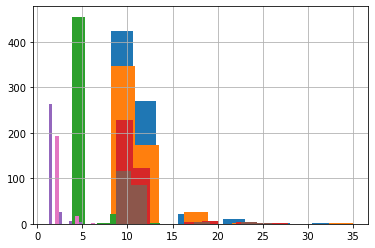

In [23]:
for i in data["product_name"].value_counts().iloc[0:7].index.tolist():
    hist = data["product_price"].loc[data["product_name"] == i].hist()

### 21. Draw a scatterplot with the number of products orderered per transaction price
#### Tips: Price should be in the X-axis and products ordered in the Y-axis

<AxesSubplot:xlabel='product_price', ylabel='quantity'>

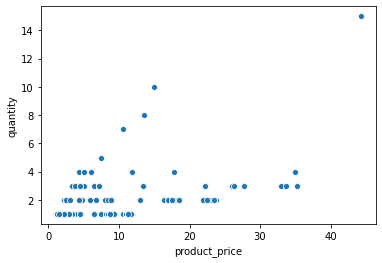

In [24]:
sbn.scatterplot(data = data, x = 'product_price', y = 'quantity')